In [3]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para visualizaciones
sns.set(style="whitegrid")


In [4]:
# Cargar el archivo CSV, asegurándonos de ignorar la primera columna vacía
dataset_path = '../Data/spotify_dataset.csv'  # Asegúrate de ajustar la ruta
spotify_df = pd.read_csv(dataset_path).drop(columns=['Unnamed: 0'], errors='ignore')

# Mostrar las primeras filas del dataset para verificar la carga correcta
spotify_df.head()


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Mostrar información general del dataset: número de filas, columnas, tipos de datos y valores nulos
spotify_df.info()

# Estadísticas básicas de las columnas numéricas
spotify_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
# Verificar la cantidad de valores nulos por columna
valores_nulos = spotify_df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

# Verificar la existencia de duplicados
duplicados = spotify_df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# Mostrar las primeras filas duplicadas si existen
if duplicados > 0:
    display(spotify_df[spotify_df.duplicated()])


Valores nulos por columna:
artists       1
album_name    1
track_name    1
dtype: int64
Número de filas duplicadas: 450


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


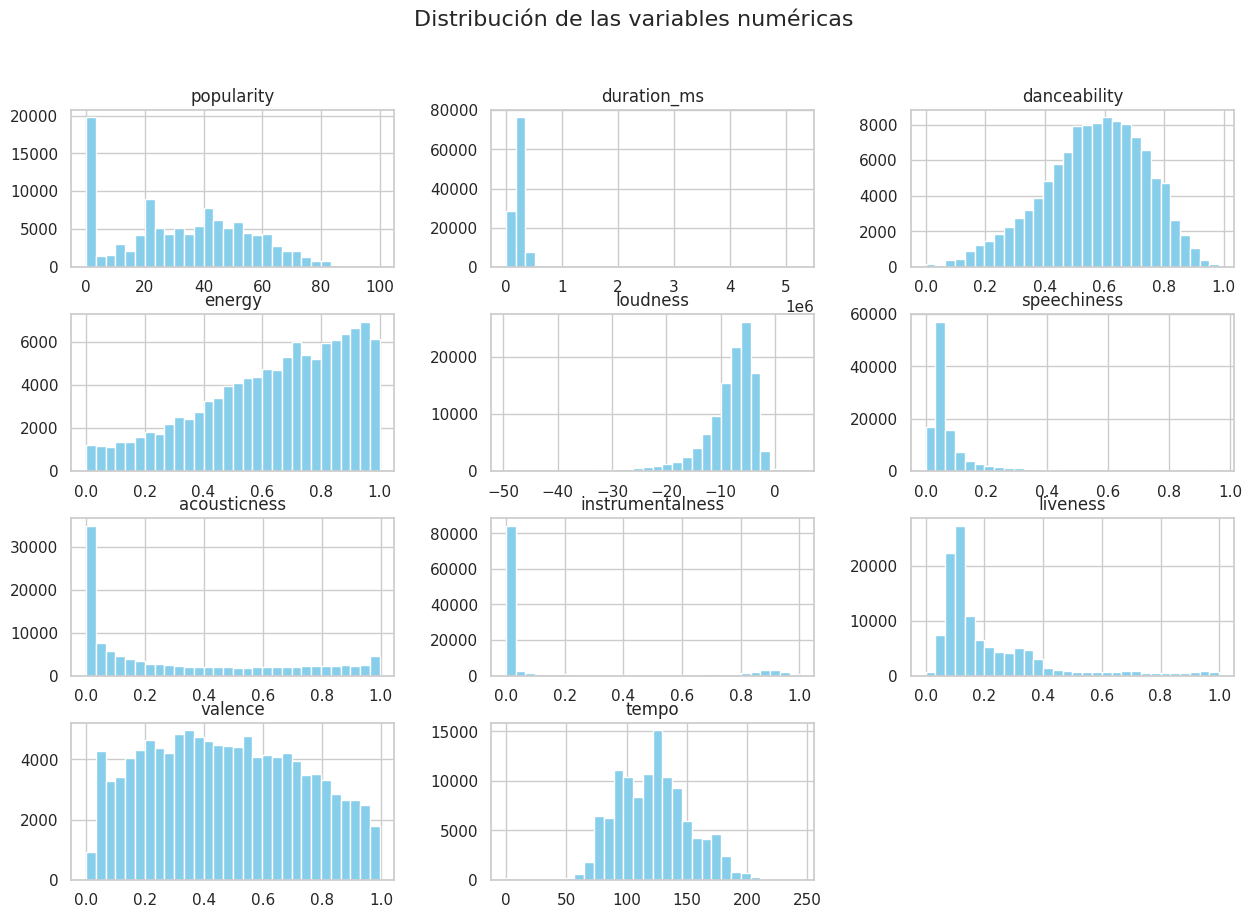

In [7]:
# Gráfico de distribución de las principales variables numéricas
num_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 
               'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Crear un gráfico de distribución para cada variable numérica
spotify_df[num_columns].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribución de las variables numéricas', fontsize=16)
plt.show()


/tmp/ipykernel_224617/3992887940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_df, y='track_genre', order=spotify_df['track_genre'].value_counts().index, palette='viridis')


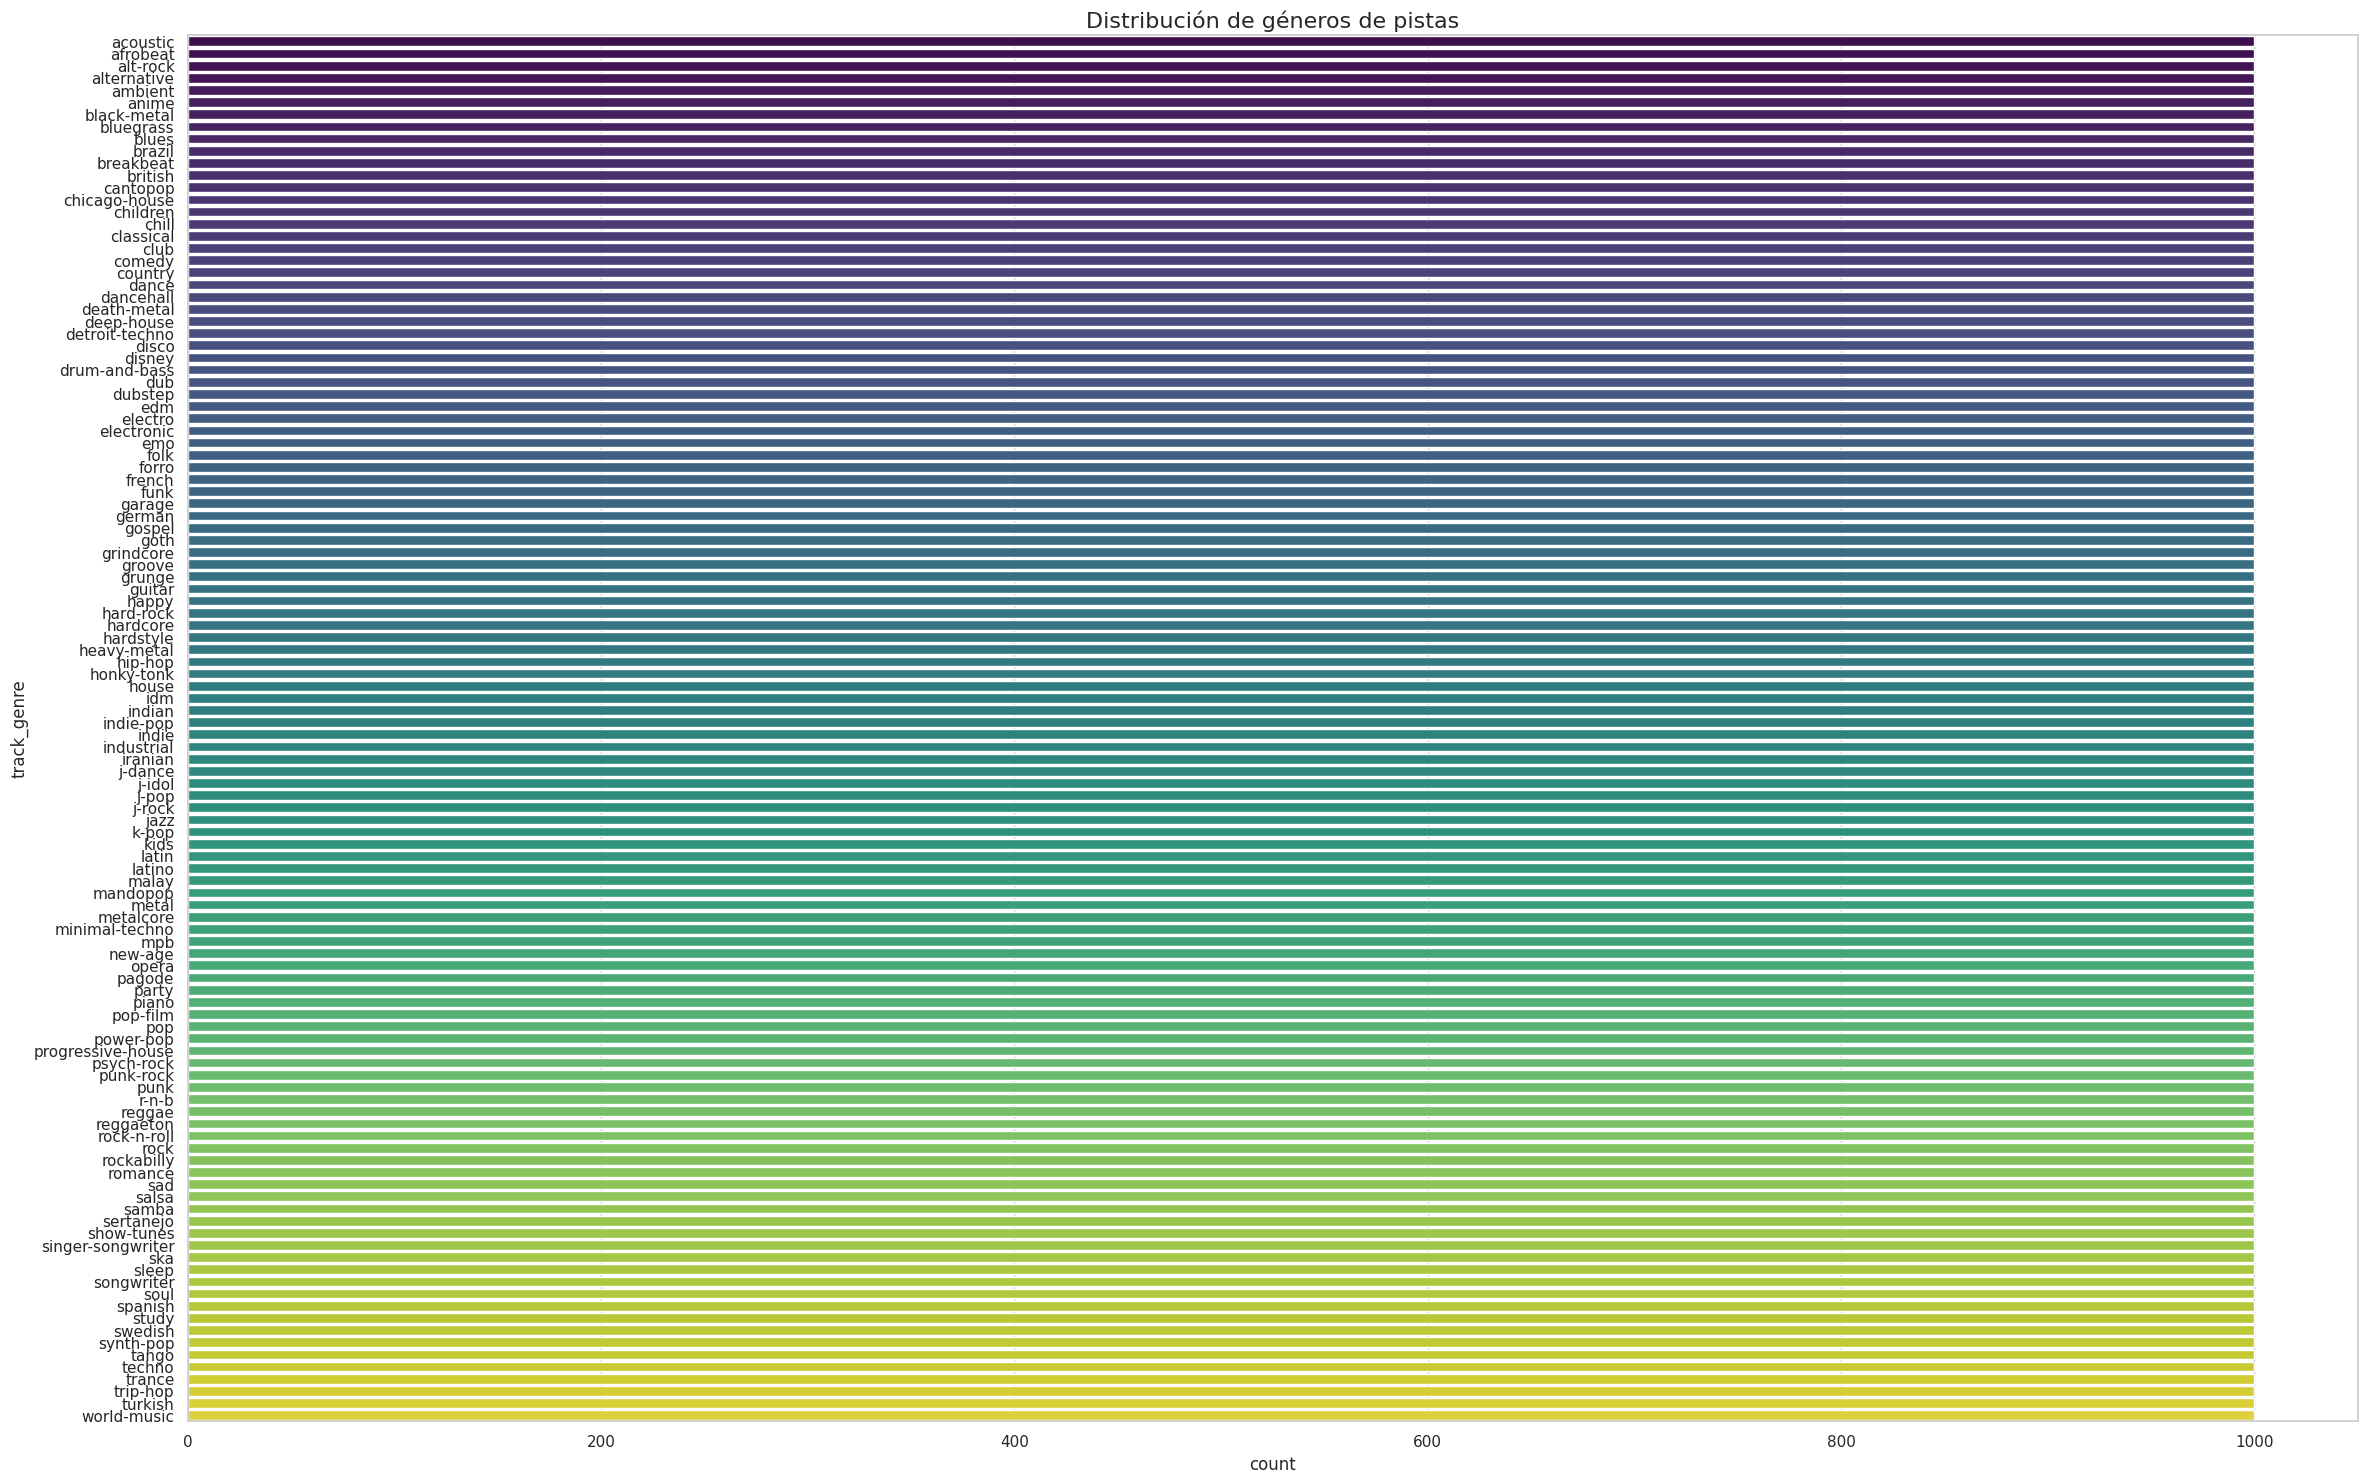

In [11]:
# Contar los géneros en la columna 'track_genre'
plt.figure(figsize=(28, 18))
sns.countplot(data=spotify_df, y='track_genre', order=spotify_df['track_genre'].value_counts().index, palette='viridis')
plt.title('Distribución de géneros de pistas', fontsize=16)
plt.show()


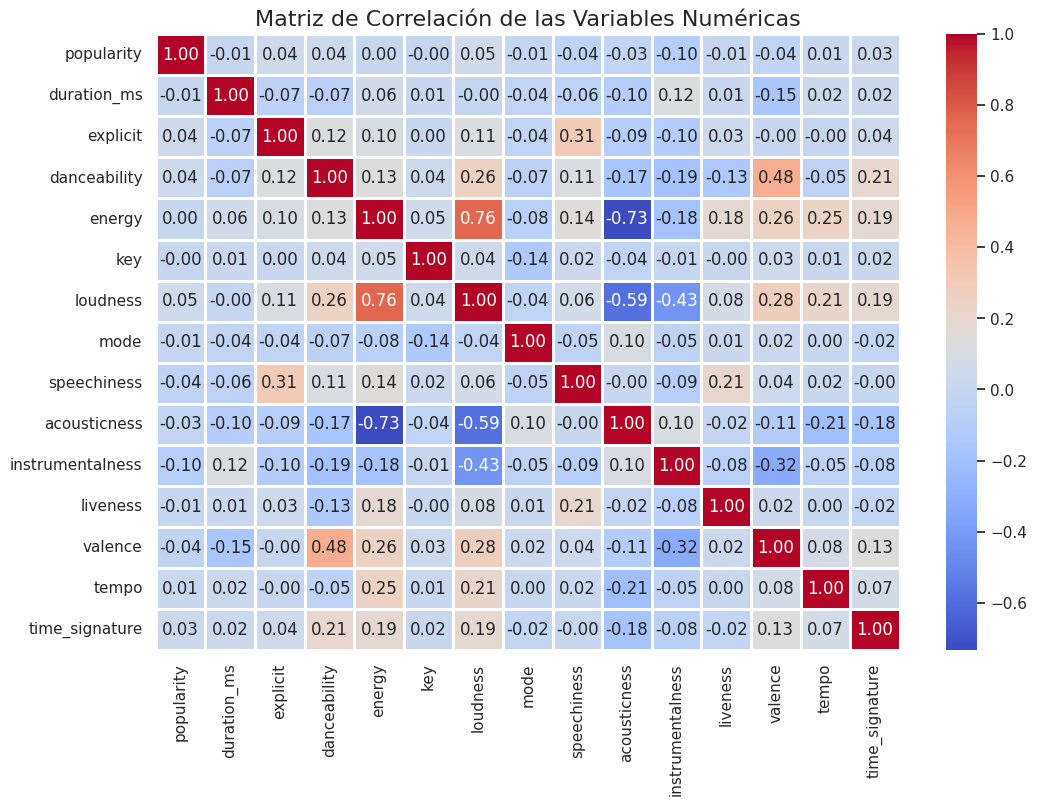

In [19]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
num_columns = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
               'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
               'liveness', 'valence', 'tempo', 'time_signature']

# Calcular la matriz de correlación solo con las columnas numéricas
correlacion = spotify_df[num_columns].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlación de las Variables Numéricas', fontsize=16)
plt.show()


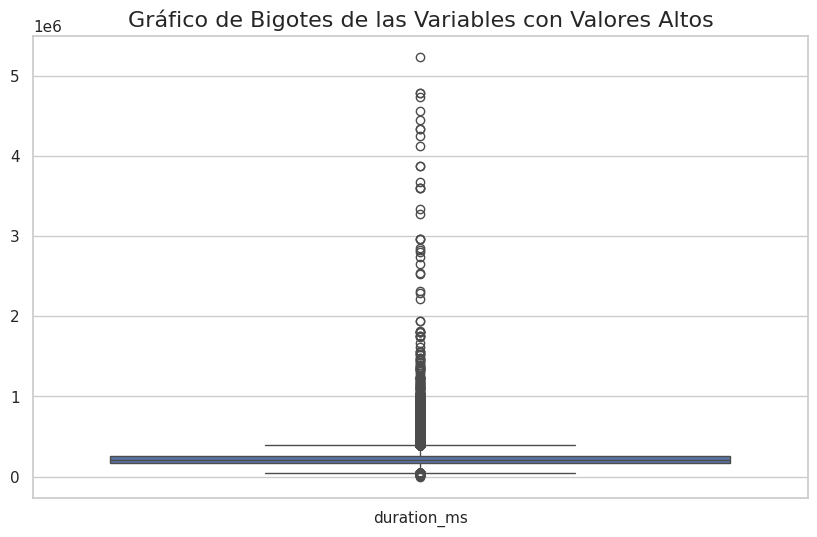

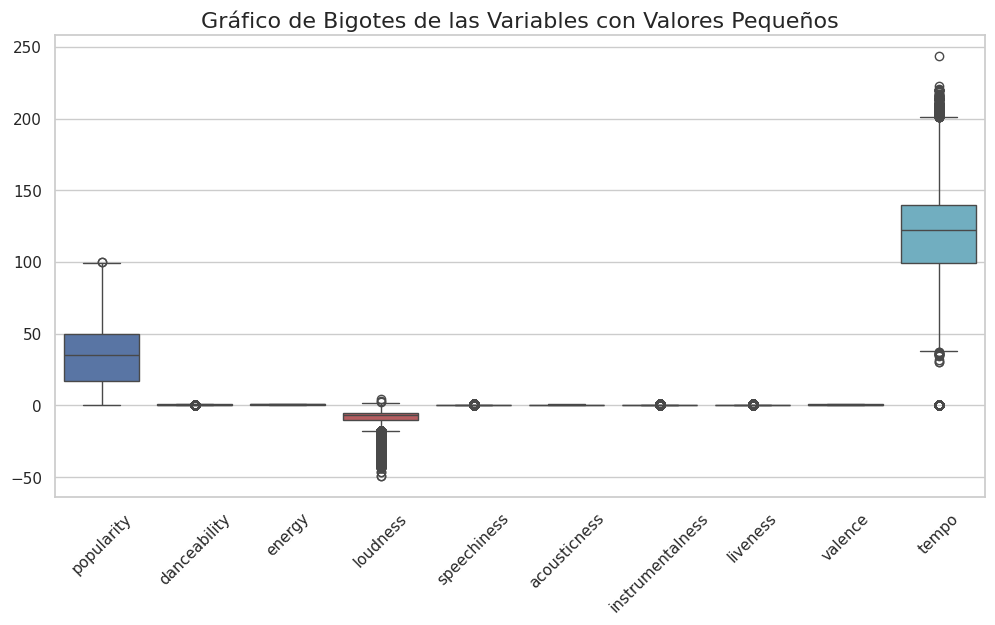

In [20]:
# Separar las columnas según la escala
variables_grandes = ['duration_ms']
variables_pequenas = ['popularity', 'danceability', 'energy', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo']

# Gráfico de bigotes para las variables con valores altos
plt.figure(figsize=(10, 6))
sns.boxplot(data=spotify_df[variables_grandes])
plt.title('Gráfico de Bigotes de las Variables con Valores Altos', fontsize=16)
plt.show()

# Gráfico de bigotes para las variables con valores pequeños
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify_df[variables_pequenas])
plt.title('Gráfico de Bigotes de las Variables con Valores Pequeños', fontsize=16)
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_224617/479753181.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Variables", y="Valores", data=spotify_df_melted, palette="Set2")


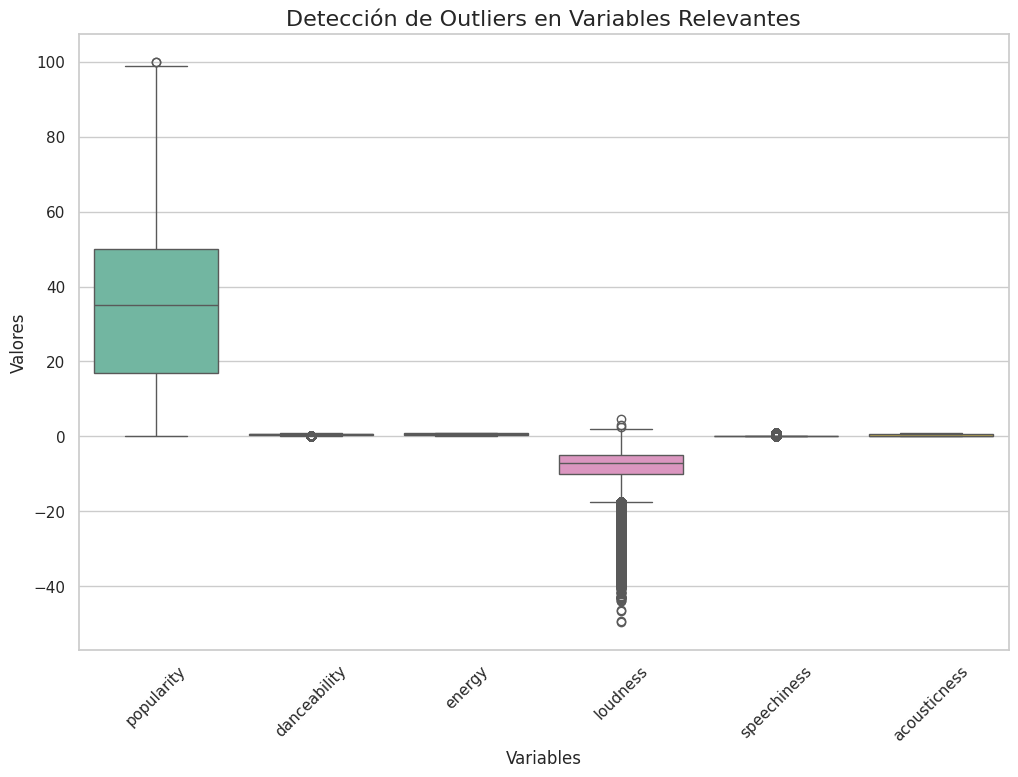

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas más relevantes para visualización estética
selected_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness']

# Crear el gráfico de boxplot para las variables seleccionadas
plt.figure(figsize=(12, 8))
spotify_df_melted = spotify_df[selected_columns].melt(var_name="Variables", value_name="Valores")
sns.boxplot(x="Variables", y="Valores", data=spotify_df_melted, palette="Set2")

plt.title('Detección de Outliers en Variables Relevantes', fontsize=16)
plt.xticks(rotation=45)
plt.show()


In [16]:
# Calcular insights básicos
popular_tracks = spotify_df[spotify_df['popularity'] > 80]
print(f"Número de canciones con popularidad mayor a 80: {len(popular_tracks)}")

# Resumen general
print("Resumen del Análisis:")
print(f"Total de filas: {spotify_df.shape[0]}")
print(f"Total de columnas: {spotify_df.shape[1]}")
print(f"Total de géneros de pista: {spotify_df['track_genre'].nunique()}")
print(f"Máxima duración de pista (ms): {spotify_df['duration_ms'].max()}")
print(f"Promedio de popularidad: {spotify_df['popularity'].mean():.2f}")


Número de canciones con popularidad mayor a 80: 954
Resumen del Análisis:
Total de filas: 114000
Total de columnas: 20
Total de géneros de pista: 114
Máxima duración de pista (ms): 5237295
Promedio de popularidad: 33.24


## Conclusiones

Distribución de popularidad:

La popularidad de las canciones en el dataset está distribuida de manera relativamente uniforme, con algunos valores atípicos en los rangos más altos de popularidad. Esto indica que algunas canciones tienen una gran popularidad en comparación con el resto.
Duración de las canciones:

Existen varias canciones con duraciones extremadamente largas (outliers), lo que podría representar errores o canciones especiales, como remixes o versiones extendidas. Sin embargo, la mayoría de las canciones tienen una duración más común en el rango de 2 a 4 minutos.
Danceability y Energy:

Ambas variables muestran una distribución normal, lo cual es consistente con lo que se esperaría en una colección de canciones populares. La mayoría de las canciones parecen tener niveles medios o altos de danceability y energía, lo que sugiere que el dataset incluye muchas canciones bailables y enérgicas.
Acousticness:

Se observan altos valores de "acousticness" en muchas pistas, lo que sugiere que hay una cantidad significativa de canciones acústicas en el dataset.
Instrumentalness:

La mayoría de las canciones tienen valores bajos de "instrumentalness", lo que indica que la mayoría de las canciones incluyen voces y no son puramente instrumentales.
Loudness y Speechiness:

Los gráficos muestran que los valores de "loudness" tienen una distribución más amplia, con la mayoría de las canciones en el rango normal de volumen. "Speechiness" tiene valores más bajos, lo que indica que la mayoría de las canciones en el dataset son predominantemente musicales en lugar de habladas.
Correlaciones:

Existen correlaciones moderadas entre algunas variables clave, como "loudness" y "energy", lo cual tiene sentido, ya que las canciones más enérgicas tienden a ser más fuertes. La popularidad no tiene una correlación fuerte con ninguna otra variable, lo que sugiere que la popularidad puede depender de muchos factores externos, no solo de las características técnicas de las canciones.
Outliers (Valores Atípicos):

Existen outliers significativos en varias variables, como la duración, popularidad y loudness. Estos valores atípicos podrían necesitar una revisión adicional para asegurarse de que no se traten de errores en los datos.
Géneros:

La distribución de géneros es amplia, con una gran variedad de estilos musicales presentes en el dataset. Esto ofrece una oportunidad interesante para realizar análisis más detallados sobre la popularidad y características de las canciones en función del género.